In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Here our dependent variable is "Good Loan" based on Good loan we approve loan

In [2]:
# load raw data
raw_data = pd.read_csv('Logistic Regression Dummy Data v3.csv')
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [3]:
raw_data.shape

(1006, 14)

In [4]:
# data pre-processing

raw_data.isna().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [5]:
raw_data.duplicated().sum()

0

In [6]:
raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop the null values

raw_data = raw_data.dropna()

In [8]:
raw_data.shape

(1001, 14)

In [9]:
raw_data.isna().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [53]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)

    if nr_values <= 10:
        print(f"The number of values for feature {column} is: {nr_values}-----{[unique_vals]}")
    else:
        print(f"The number of values for feature {column} is: {nr_values}")

The number of values for feature Type of Account is: 4-----[array(['No Data', 'Type A', 'Type B', 'Type C'], dtype=object)]
The number of values for feature Account History is: 3-----[array(['Average (known delays)', 'Good', 'critical'], dtype=object)]
The number of values for feature Reason for the Loan is: 10-----[array(['Advance Edu/training', 'All other', 'Buying a New Car',
       'Buying a Used Car', 'Home Devices', 'Home furniture',
       'Learning / Edu purposes', 'Renovation', 'Support for Business',
       'TV'], dtype=object)]
The number of values for feature Loan Amount is: 910
The number of values for feature Account Savings is: 5-----[array(['0-200', '1000+', '200-500', '500-1000', 'No Data'], dtype=object)]
The number of values for feature Employment History is: 5-----[array(['0-2 Years', '2-5 Years', '5-7 Years', '7+ Years', 'Unemployed'],
      dtype=object)]
The number of values for feature Individual Stauts is: 4-----[array(['Divorced', 'Female', 'Male', 'Married'],

In [11]:
# sns.pairplot(raw_data[['Age', 'Loan Amount']])   # this doesnot work i don't know why?  (update: i think it is due to outlier that exists below:)

In [12]:
raw_data[raw_data['Age'] > 100]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


In [13]:
raw_data = raw_data[raw_data['Age'] < 100]

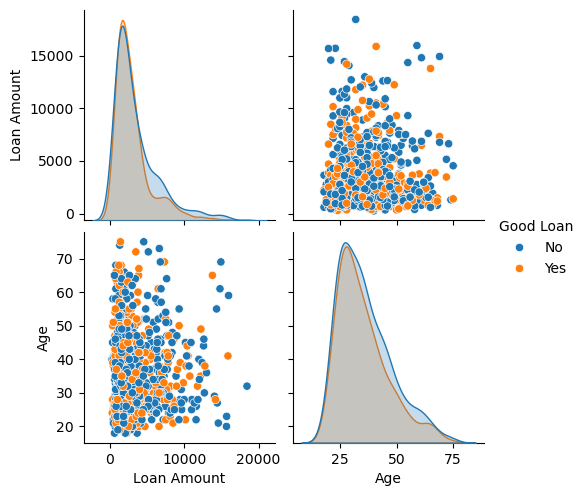

In [14]:
sns.pairplot(raw_data, hue='Good Loan')
plt.show()

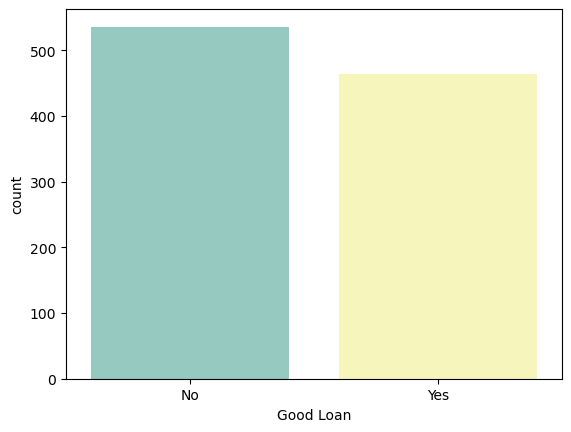

In [15]:
# investigation the distribution of Y == dependent variable

sns.countplot(x = 'Good Loan', hue = 'Good Loan', data = raw_data, palette='Set3')
plt.show()

In [16]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

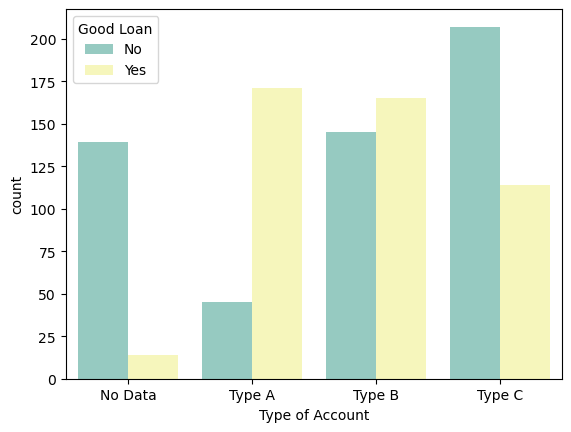

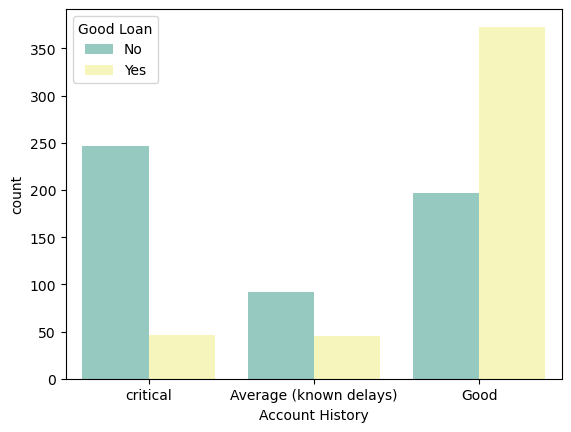

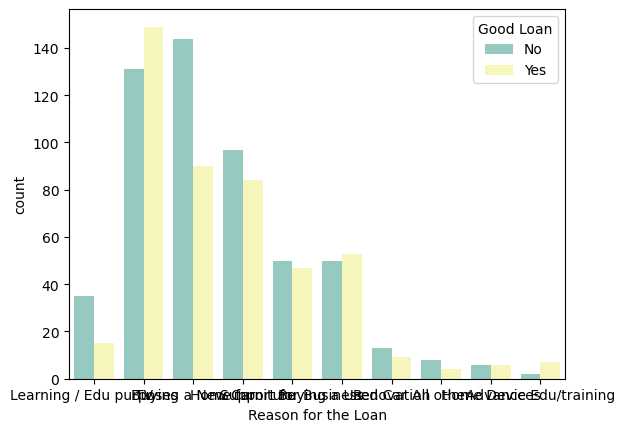

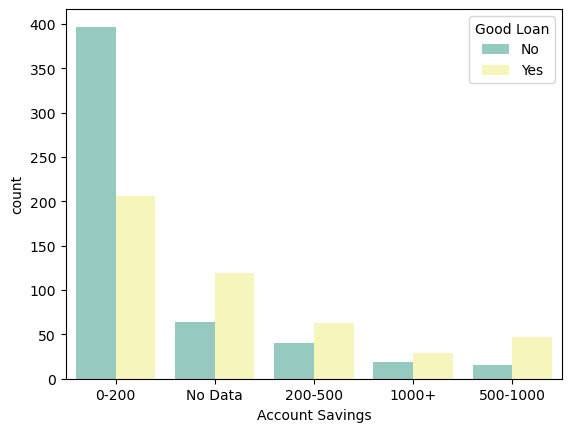

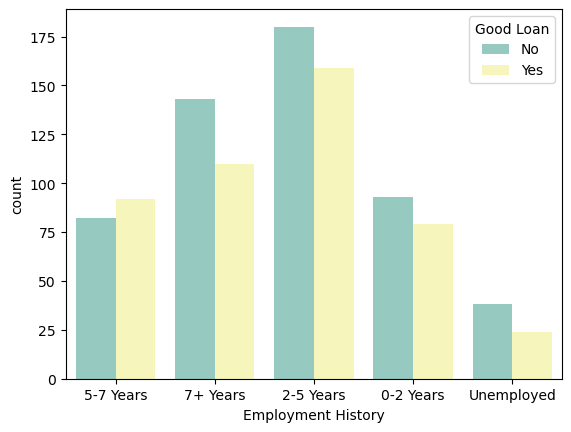

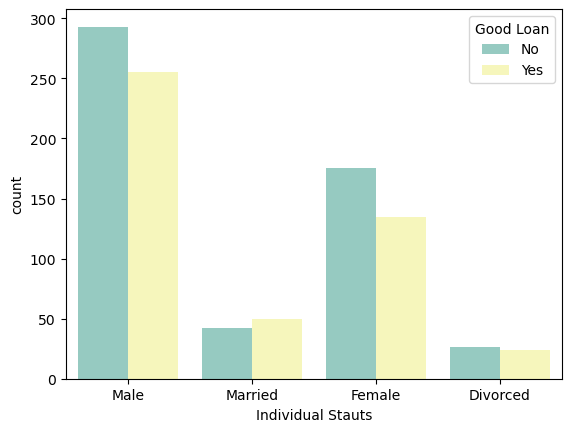

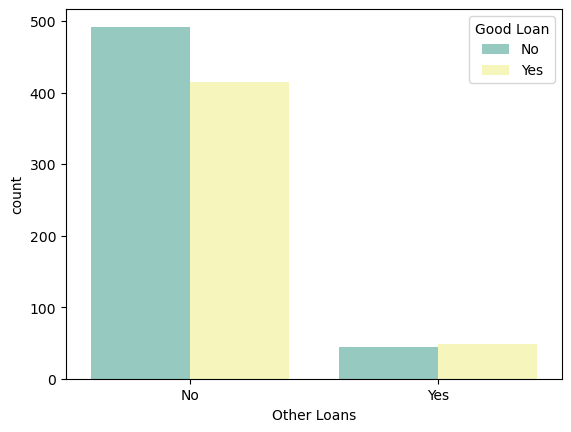

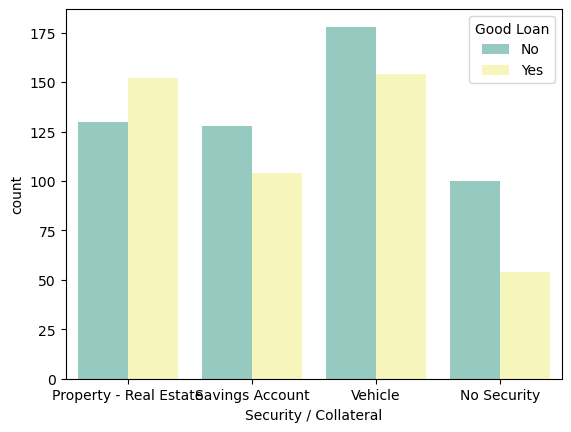

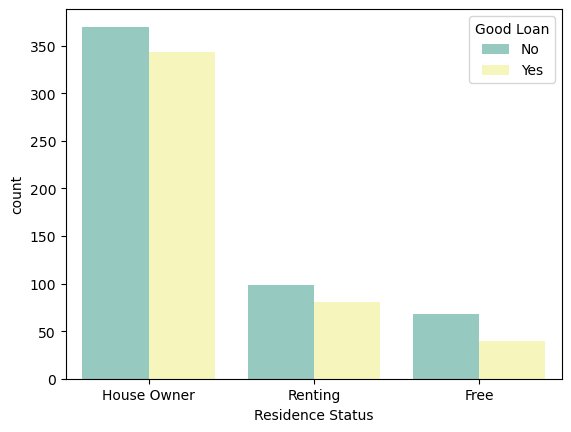

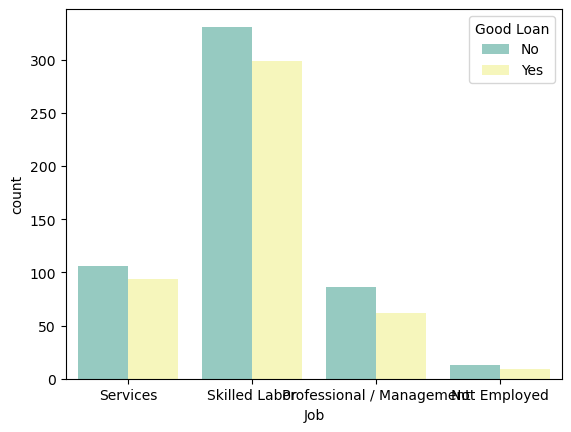

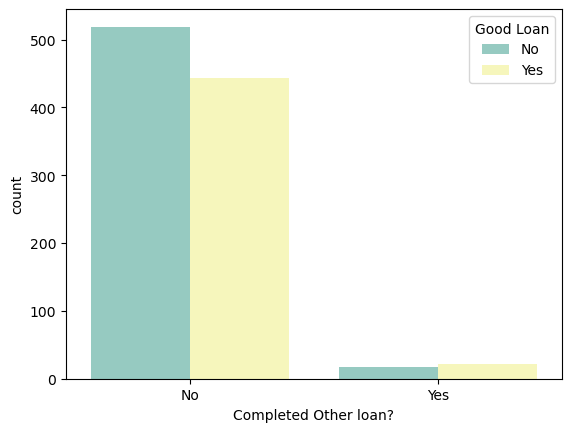

In [17]:
features = ['Type of Account', 'Account History', 'Reason for the Loan',
         'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    # plt.figure(figsize=(15,10))
    sns.countplot(x = f, hue = 'Good Loan', data = raw_data, palette='Set3')
    plt.show()

In [18]:
# now we change the categorical data into numeric data, so we can apply mathematical calculation later on
# we keep dependent variable y (i.e good loan untouched)

new_raw_data = pd.get_dummies(raw_data, columns = features)
new_raw_data.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,True,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,2438.0,52.0,No,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,2144.0,48.0,No,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,True,False
3,2073.0,25.0,No,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,False,True
4,1276.0,59.0,No,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [19]:
new_raw_data.shape

(1000, 49)

In [20]:
# change yes,no values of good loan to 0 and 1
new_raw_data['Good Loan'] = new_raw_data['Good Loan'].map({'Yes': 1, 'No': 0})
new_raw_data.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,True,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,2438.0,52.0,0,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,2144.0,48.0,0,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,True,False
3,2073.0,25.0,0,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,False,True
4,1276.0,59.0,0,True,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [57]:
# feature importance selection:

# split the data into X and y
x = new_raw_data.drop('Good Loan', axis=1)
X = new_raw_data.drop('Good Loan', axis=1).values  # X will be features other than y variable ( also axis=1 drops column and axis=0 drops row )
y = new_raw_data['Good Loan']
y = y.astype(int)
print(X.shape)
print(y.shape)
columns_to_keep_dt = x.columns


(1000, 48)
(1000,)


Index(['Loan Amount', 'Age', 'Type of Account_No Data',
       'Type of Account_Type A', 'Type of Account_Type B',
       'Type of Account_Type C', 'Account History_Average (known delays)',
       'Account History_Good', 'Account History_critical',
       'Reason for the Loan_Advance Edu/training',
       'Reason for the Loan_All other', 'Reason for the Loan_Buying a New Car',
       'Reason for the Loan_Buying a Used Car',
       'Reason for the Loan_Home Devices',
       'Reason for the Loan_Home furniture',
       'Reason for the Loan_Learning / Edu purposes',
       'Reason for the Loan_Renovation',
       'Reason for the Loan_Support for Business', 'Reason for the Loan_TV',
       'Account Savings_0-200', 'Account Savings_1000+',
       'Account Savings_200-500', 'Account Savings_500-1000',
       'Account Savings_No Data', 'Employment History_0-2 Years',
       'Employment History_2-5 Years', 'Employment History_5-7 Years',
       'Employment History_7+ Years', 'Employment Histor

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=7)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=15)

In [23]:
fi_col = []
fi = []
for i, column in enumerate(x):
    print(f"The feature importance for {column} is: {dt.feature_importances_[i]}")
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    

The feature importance for Loan Amount is: 0.0983989763241899
The feature importance for Age is: 0.06361573569584952
The feature importance for Type of Account_No Data is: 0.0711990779068847
The feature importance for Type of Account_Type A is: 0.06528676467237185
The feature importance for Type of Account_Type B is: 0.019106772028450007
The feature importance for Type of Account_Type C is: 0.0
The feature importance for Account History_Average (known delays) is: 0.0
The feature importance for Account History_Good is: 0.25115172873512254
The feature importance for Account History_critical is: 0.0
The feature importance for Reason for the Loan_Advance Edu/training is: 0.0
The feature importance for Reason for the Loan_All other is: 0.0
The feature importance for Reason for the Loan_Buying a New Car is: 0.010415373562826836
The feature importance for Reason for the Loan_Buying a Used Car is: 0.008629288021489231
The feature importance for Reason for the Loan_Home Devices is: 0.0
The feat

In [24]:
# convert thos features and its importance into dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])
fi_df.head()

,Feature,Feature Importance
0,Loan Amount,0.098399
1,Age,0.063616
2,Type of Account_No Data,0.071199
3,Type of Account_Type A,0.065287
4,Type of Account_Type B,0.019107


In [25]:
# now to select the feature with high feature importance we sort the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
fi_df

,index,Feature,Feature Importance
0,7,Account History_Good,0.251152
1,19,Account Savings_0-200,0.250183
2,0,Loan Amount,0.098399
3,2,Type of Account_No Data,0.071199
4,3,Type of Account_Type A,0.065287
5,1,Age,0.063616
6,20,Account Savings_1000+,0.025220
7,36,Security / Collateral_Property - Real Estate,0.019304
8,4,Type of Account_Type B,0.019107
9,45,Job_Skilled Labor,0.018343


In [26]:
# now we removge all the features having feature importance as 0
fi_df.columns
columns_to_keep = fi_df['Feature'][:24]
columns_to_keep

0                             Account History_Good
1                            Account Savings_0-200
2                                      Loan Amount
3                          Type of Account_No Data
4                           Type of Account_Type A
5                                              Age
6                            Account Savings_1000+
7     Security / Collateral_Property - Real Estate
8                           Type of Account_Type B
9                                Job_Skilled Labor
10                         Account Savings_No Data
11              Reason for the Loan_Home furniture
12               Security / Collateral_No Security
13            Reason for the Loan_Buying a New Car
14                    Employment History_5-7 Years
15           Reason for the Loan_Buying a Used Car
16                                  Other Loans_No
17                    Employment History_0-2 Years
18                           Residence Status_Free
19                        Accou

In [27]:
# new raw data

print(new_raw_data[columns_to_keep].shape)
print(new_raw_data.shape)


(1000, 24)
(1000, 49)


In [28]:
X = new_raw_data[columns_to_keep].values
X
y = new_raw_data['Good Loan']
y = y.astype(int)
print(X.shape)
print(y.shape)

(1000, 24)
(1000,)


In [29]:
# split training data and testin data
from sklearn.model_selection import train_test_split
# first one

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15, train_size=0.8, test_size=0.2)

#second one (this is to split the training data further for validations later on)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=15, train_size=0.9, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(720, 24)
(200, 24)
(80, 24)
(720,)
(200,)
(80,)


C:\Users\A cer\AppData\Local\Temp\ipykernel_4992\311332279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_valid, palette='Set2')


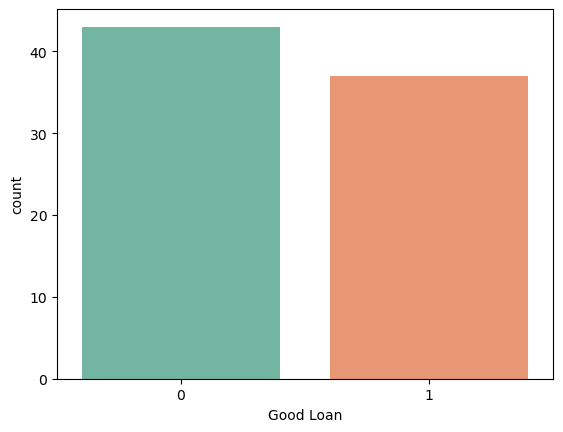

In [30]:
# investigate distributions of all y's

# sns.countplot(x = y_train, palette='Set2')
# sns.countplot(x = y_test, palette='Set2')
sns.countplot(x = y_valid, palette='Set2')
plt.show()

In [31]:
# Logistic regression

# Linear regression is used to predict numbers but logistic regression is ued to predict decision like yes or no (this case: good loan or bad loan)

# we use Maximum Likelihood Estimation

# training model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=10, max_iter=1000)
log_reg.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=10)

In [32]:
# predict class labels for sample in X

y_predict  = log_reg.predict(X_train)
y_predict.shape

(720,)

In [33]:
predict_probability = log_reg.predict_proba(X_train)
predict_probability.shape

# coefficient of the features in the decision function
coefficient = log_reg.coef_
coefficient

array([[ 1.72068327e+00, -1.48434794e+00, -1.14210490e-04,
        -1.36028397e+00,  1.16679067e+00,  5.36286676e-03,
         3.01311628e-01,  4.67091684e-01,  4.08132228e-01,
        -7.17240861e-03,  4.13035324e-01,  2.21234246e-01,
        -6.58505913e-01, -7.17112408e-01,  5.61871188e-01,
         5.49348197e-01, -3.10268538e-01, -4.31115565e-01,
         5.62452539e-01,  4.31731389e-01,  3.46344267e-01,
         1.09716562e-01,  3.13604610e-01,  8.17154970e-02]])

In [34]:
# Evaluate the model

# Accuracy on training 
train_score = log_reg.score(X_train, y_train)

# Accuracy on training 
test_score = log_reg.score(X_test, y_test)

print(f"Accuracy on training data: {train_score}")
print(f"Accuracy onn testing data: {test_score}")

Accuracy on training data: 0.7888888888888889
Accuracy onn testing data: 0.765


In [35]:
# classification report
from sklearn.metrics import classification_report
classifiaction_report = classification_report(y_train, y_predict)
print(classifiaction_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       387
           1       0.77      0.77      0.77       333

    accuracy                           0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



In [36]:
# confusion matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmax=1, vmin=0, annot=True)
        
    else:
        print("no classes to create heatmap")
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

In [37]:
# confusion matrifrom sklearn.metrics import confusion_matrixx
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict)
print(cm)
cm_normalize = cm / cm.sum(axis=1).reshape(-1,1)
print(cm_normalize)

[[312  75]
 [ 77 256]]
[[0.80620155 0.19379845]
 [0.23123123 0.76876877]]


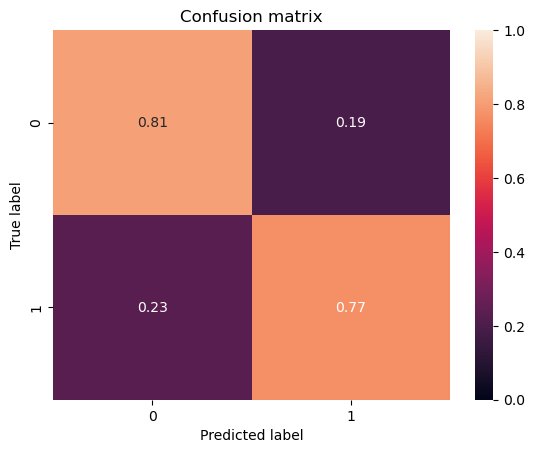

In [38]:
plot_confusion_matrix(cm_normalize, classes=log_reg.classes_)

In [39]:
# calculating False positive (FP), False negative (FN), True Positive(TP), True Negative(TN)

# print(np.diagonal(cm))
# print(cm.sum(axis=0))

FP = cm.sum(axis=0) - np.diagonal(cm)   # sum of positive axis - diagonal
FN = cm.sum(axis=1) - np.diagonal(cm)   # sum of negetive axis - diagonal

TP = np.diagonal(cm)                    # just diagonal value
TN = cm.sum() - (FP + FN + TP)          # sum of all confusion matrix - (FP + FN + TP)

# sensitivity, hit rate, recal, or true positive rate

TPR = TP/(TP+FN)
print(f"the True Positive rate is: {TPR}   # out of bad loan {TPR[0]*100:.2f}% were predicted and {TPR[1]*100:.2f}% of good loan were predicted")
# 0=bad loan  1=good loan

# precision or positive predictive value

PPV = TP/(TP+FP)
print(f"the Positive Predictive Value is: {PPV}")

# false positive rate or false alaram rate

FPR = FP/(FP+TN)
print(f"The False positive rate is: {FPR}")

# false negative rate or miss rate

FNR = FN/(FN+TP)
print(f"The false negative rate is: {FNR}")



# Total averages

print(f"\nthe average TPR is: {TPR.sum()/2}")
print(f"the average PPV is: {PPV.sum()/2}")
print(f"the average FPR is: {FPR.sum()/2}")
print(f"the average FNR is: {FNR.sum()/2}")

the True Positive rate is: [0.80620155 0.76876877]   # out of bad loan 80.62% were predicted and 76.88% of good loan were predicted
the Positive Predictive Value is: [0.80205656 0.7734139 ]
The False positive rate is: [0.23123123 0.19379845]
The false negative rate is: [0.19379845 0.23123123]

the average TPR is: 0.7874851595781829
the average PPV is: 0.7877352262754449
the average FPR is: 0.21251484042181717
the average FNR is: 0.21251484042181717


In [40]:
# Logarithmic loss or log loss or cross-entropy loss
from sklearn.metrics import log_loss
# running log loss in training

train_loss = log_loss(y_train, predict_probability)
print(f"Loss on training is: {train_loss}")

# running log loss on testing
predict_probability_t = log_reg.predict_proba(X_test)
test_loss = log_loss(y_test, predict_probability_t)
print(f"Loss on testing is: {test_loss}")

Loss on training is: 0.4567409276054442
Loss on testing is: 0.49535760374682364


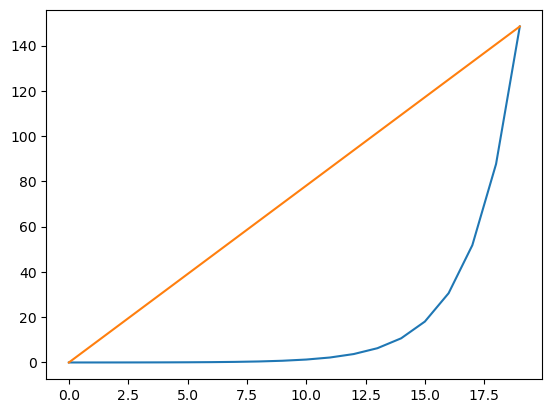

In [41]:
# Hyper Parameter tuning
# we will loop over parameter C (inverse of regularization strength)
# help to maintain global minimum over local minimum


# creating an range for c values

plt.plot(np.geomspace(1*np.exp(-5), 1*np.exp(5), num=20))  # uniformly distributed in log space
plt.plot(np.linspace(np.exp(-5), np.exp(5), num=20))       # uniformly distributed in linear space
plt.show()            


the CA value for c value 0.006737946999085467 is: 0.705
the Logarithmic Loss for c value 0.006737946999085467 is: 0.6147722522741751



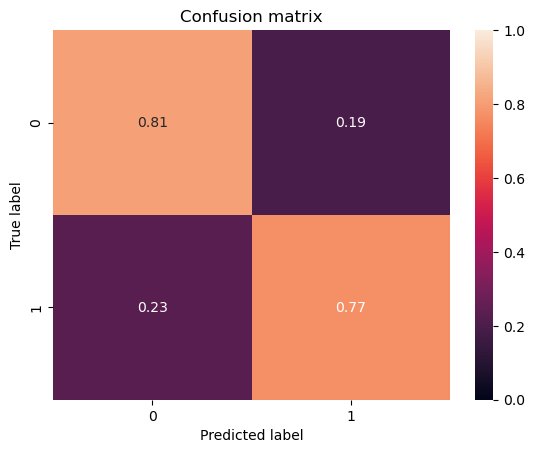

the CA value for c value 0.011405219123170525 is: 0.725
the Logarithmic Loss for c value 0.011405219123170525 is: 0.5870659048657975



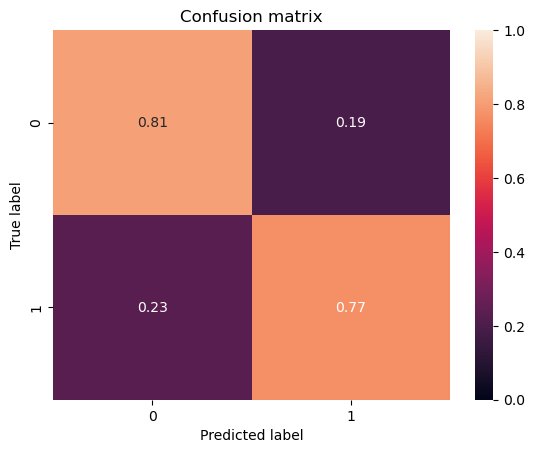

the CA value for c value 0.019305438773144112 is: 0.725
the Logarithmic Loss for c value 0.019305438773144112 is: 0.5599632039002871



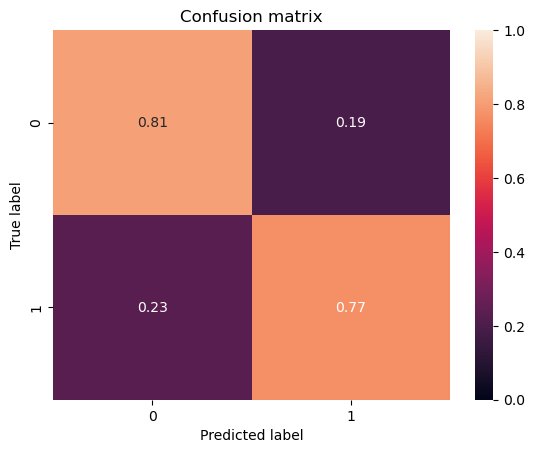

the CA value for c value 0.03267801891385403 is: 0.735
the Logarithmic Loss for c value 0.03267801891385403 is: 0.5368579935936798



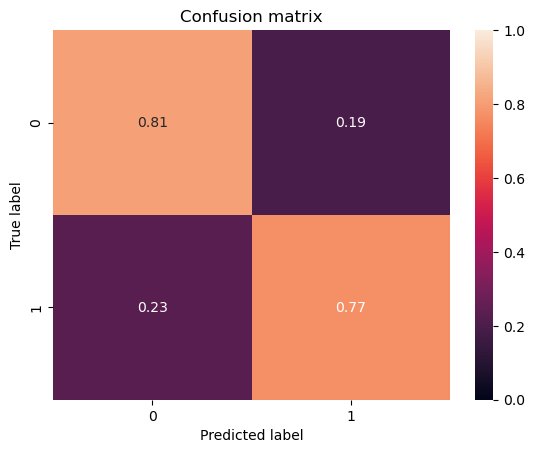

the CA value for c value 0.055313579384670464 is: 0.74
the Logarithmic Loss for c value 0.055313579384670464 is: 0.5193510111479075



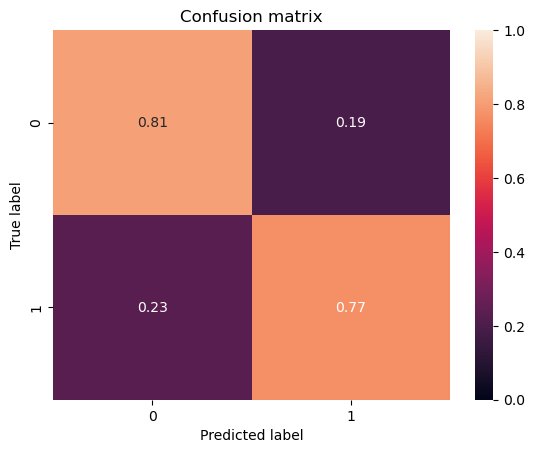

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 0.09362844401338878 is: 0.745
the Logarithmic Loss for c value 0.09362844401338878 is: 0.5077756785851727



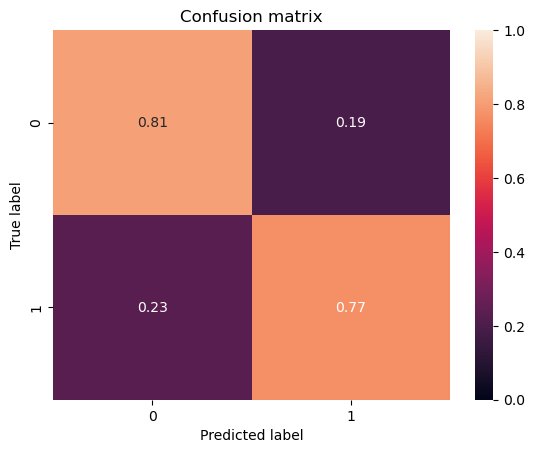

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 0.15848342533402837 is: 0.745
the Logarithmic Loss for c value 0.15848342533402837 is: 0.50083544244013



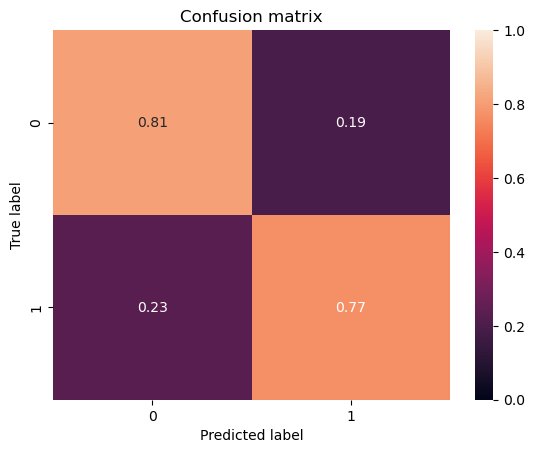

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 0.2682624534699609 is: 0.755
the Logarithmic Loss for c value 0.2682624534699609 is: 0.49737378353653566



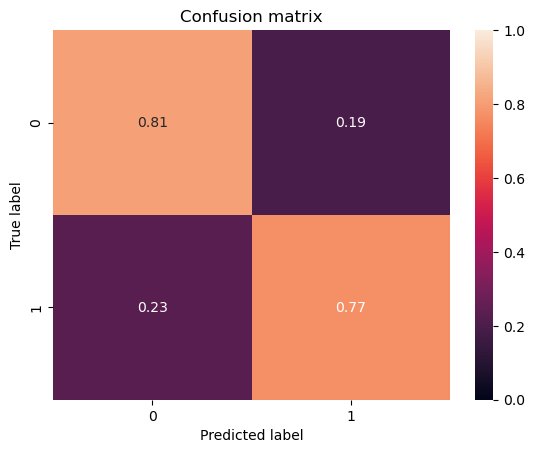

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 0.45408372383450274 is: 0.765
the Logarithmic Loss for c value 0.45408372383450274 is: 0.49575267650612376



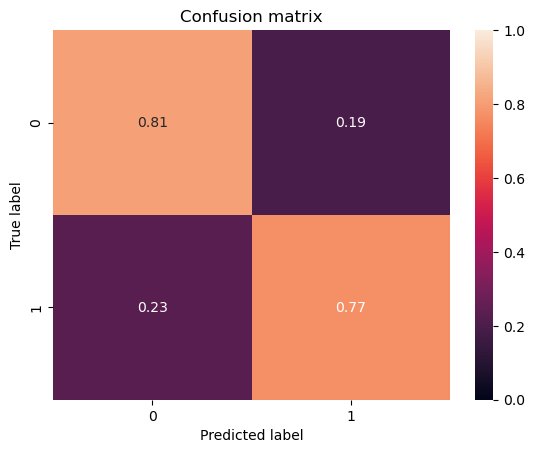

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 0.768620526593736 is: 0.765
the Logarithmic Loss for c value 0.768620526593736 is: 0.4955191937515633



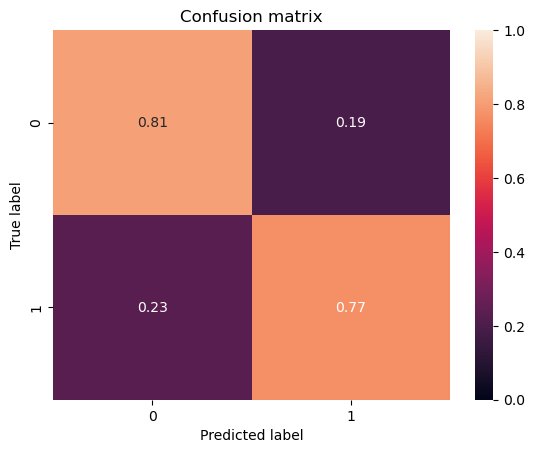

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 1.3010321288603361 is: 0.765
the Logarithmic Loss for c value 1.3010321288603361 is: 0.4961217409202176



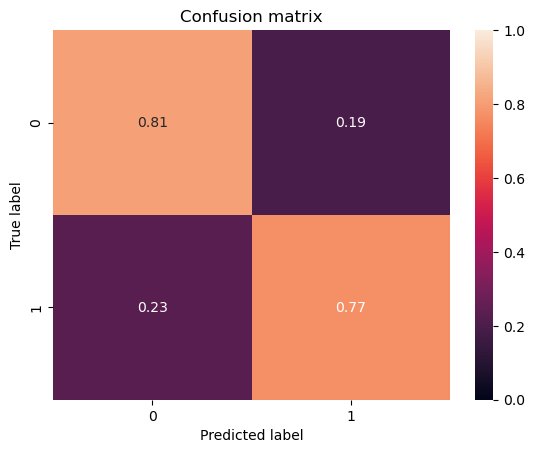

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 2.2022370490523553 is: 0.765
the Logarithmic Loss for c value 2.2022370490523553 is: 0.4960765487747077



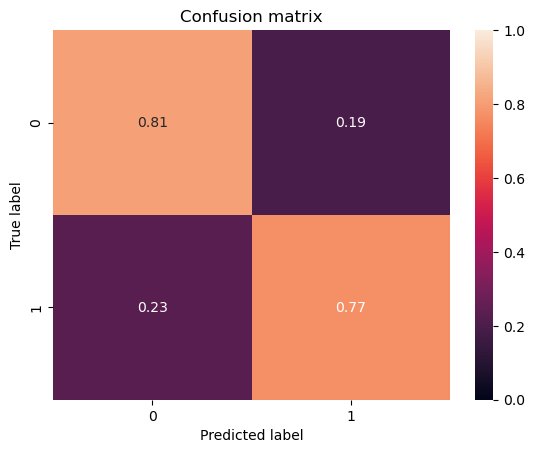

the CA value for c value 3.727692739200182 is: 0.765
the Logarithmic Loss for c value 3.727692739200182 is: 0.4963021764699036



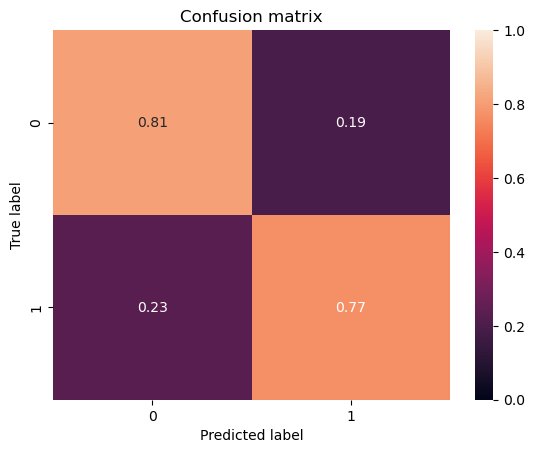

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 6.309808094394386 is: 0.765
the Logarithmic Loss for c value 6.309808094394386 is: 0.4970043198179502



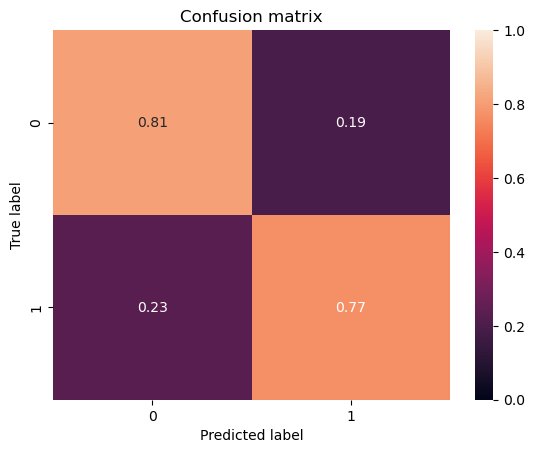

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 10.680514992399115 is: 0.77
the Logarithmic Loss for c value 10.680514992399115 is: 0.49781640222375345



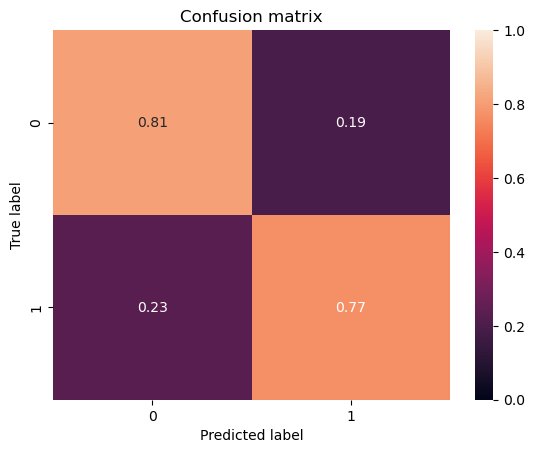

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 18.078743251194094 is: 0.765
the Logarithmic Loss for c value 18.078743251194094 is: 0.49693874780296626



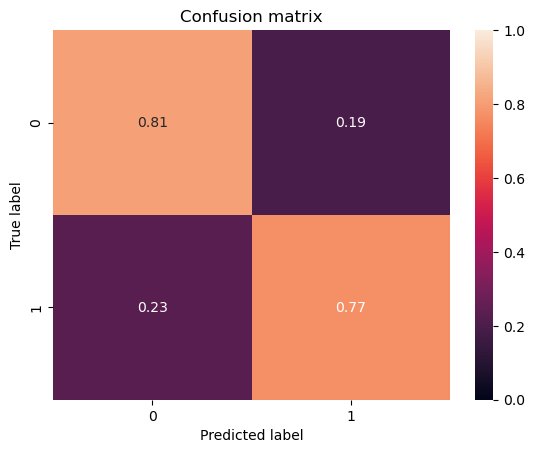

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 30.601610294559332 is: 0.765
the Logarithmic Loss for c value 30.601610294559332 is: 0.49686637425294405



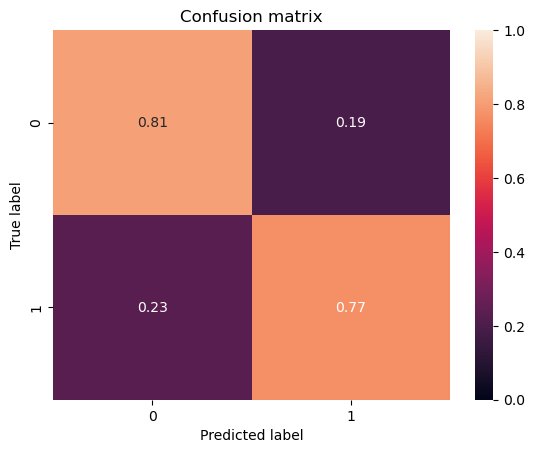

the CA value for c value 51.79887449080439 is: 0.765
the Logarithmic Loss for c value 51.79887449080439 is: 0.496678606894494



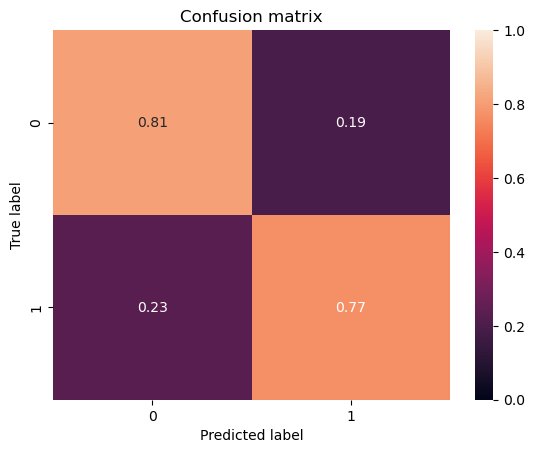

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 87.67915716484823 is: 0.765
the Logarithmic Loss for c value 87.67915716484823 is: 0.4962039109610386



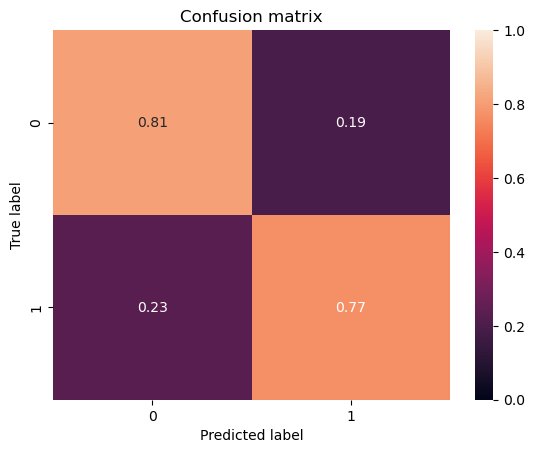

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the CA value for c value 148.4131591025766 is: 0.765
the Logarithmic Loss for c value 148.4131591025766 is: 0.4965716426017174



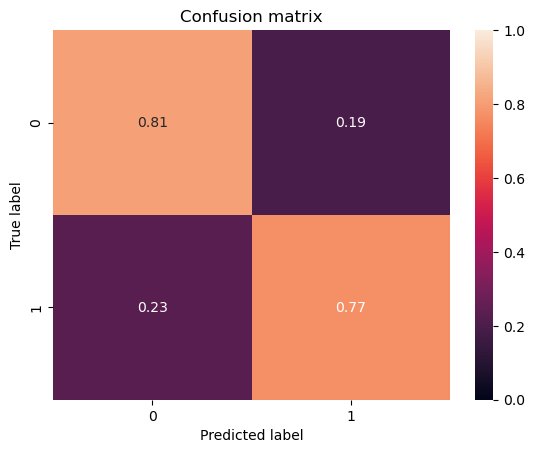

In [43]:
# looping over the parameters

C_list = np.geomspace(1*np.exp(-5), 1*np.exp(5), num=20)
CA = []   # CA == Clasiffication acuuracy
Logarithmic_Loss = []

for c in C_list:
    log_reg2 = LogisticRegression(random_state=10, C=c, max_iter=1000)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print(f"the CA value for c value {c} is: {score}")
    predict_probability_t = log_reg2.predict_proba(X_test)
    logarithmic_loss = log_loss(y_test, predict_probability_t)
    Logarithmic_Loss.append(logarithmic_loss)
    print(f"the Logarithmic Loss for c value {c} is: {logarithmic_loss}\n")

    cm = confusion_matrix(y_train, y_predict)
    cm_normalize = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_normalize, classes=log_reg.classes_)
    

In [44]:
# reshaping

CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)
Logarithmic_Loss2

array([0.61477225, 0.5870659 , 0.5599632 , 0.53685799, 0.51935101,
       0.50777568, 0.50083544, 0.49737378, 0.49575268, 0.49551919,
       0.49612174, 0.49607655, 0.49630218, 0.49700432, 0.4978164 ,
       0.49693875, 0.49686637, 0.49667861, 0.49620391, 0.49657164])

In [45]:
# combine those values

outcomes = zip(C_list, CA2, Logarithmic_Loss2)

# convert into dataframe

df_outcomes = pd.DataFrame(outcomes, columns = ['C_list', 'Classification Accuracy', 'Logarithmic Loss'])
df_outcomes

# sort values

df_outcomes.sort_values('Logarithmic Loss', ascending = True).reset_index()

# here logarithmic loss for index 0 is low but classification accuracy is not highest (but we choose to have low loss over high accuracy)

,index,C_list,Classification Accuracy,Logarithmic Loss
0,9,0.768621,0.765,0.495519
1,8,0.454084,0.765,0.495753
2,11,2.202237,0.765,0.496077
3,10,1.301032,0.765,0.496122
4,18,87.679157,0.765,0.496204
5,12,3.727693,0.765,0.496302
6,19,148.413159,0.765,0.496572
7,17,51.798874,0.765,0.496679
8,16,30.601610,0.765,0.496866
9,15,18.078743,0.765,0.496939


In [46]:
# another way of doing it is using LogisticResgressionCV library

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=0, shuffle=True)

log_reg3 = LogisticRegressionCV(cv=kf, random_state=15, Cs = C_list)
log_reg3.fit(X_train, y_train)
print(f"The CA  is: {log_reg3.score(X_test, y_test)}")

predict_proba = log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, predict_proba)
print(f"the logarithmic loss is: {log_loss3}")
print(f"the C parameter is {log_reg3.C_}")

# this CA and log loss is different than our calulation

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

The CA  is: 0.75
the logarithmic loss is: 0.501222658446988
the C parameter is [0.15848343]


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# training Dummmy classifier (our trained model must always beat dummmy clasifier or at least it is best practice)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)

score = dummy_clf.score(X_test,y_test)

predict_proba_dummy = dummy_clf.predict_proba(X_test)
log_loss_dummy = log_loss(y_test, predict_proba_dummy)

print(f"acuuracy: {score}")
print(f"log loss: {log_loss_dummy}")

# Since our accuracy is greater and loss is low so our trained model is better

acuuracy: 0.53
log loss: 16.94051709288506


In [48]:
# final model pass the final c value 

log_reg_final = LogisticRegression(random_state=10, C=1.301032)
log_reg_final.fit(X_train, y_train)
score_f = log_reg_final.score(X_valid, y_valid)   # we calculate this Accuracy score on X_valid, y_valid this time


predict_probability_t_f = log_reg_final.predict_proba(X_valid)   # we calculate this predicted probability on X_valid this time
logarithmic_loss_f = log_loss(y_valid, predict_probability_t_f)

print(f"Accuracy: {score_f}")
print(f"log loss: {logarithmic_loss_f}")

Accuracy: 0.7625
log loss: 0.43893976063806023


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
import joblib

joblib.dump(log_reg2, 'loan_logistic_model.pkl')
joblib.dump(dt, 'loan_approval_model_dt.pkl')


['loan_approval_model_dt.pkl']

In [54]:
import json

with open("model_features.json", "w") as f:
    json.dump(columns_to_keep.tolist(), f)

In [58]:
with open("model_features_dt.json", "w") as f:
    json.dump(columns_to_keep_dt.tolist(), f)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=15, train_size=0.8, test_size=0.2)

In [62]:
from sklearn.tree import DecisionTreeClassifier
new_dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=7)
new_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=15)

In [64]:
joblib.dump(new_dt, 'loan_approval_model_dt.pkl')

['loan_approval_model_dt.pkl']